### Predict Future Sales
##### Predict total sales for every product and store in the next month

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [20]:
#reading the data
categories = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv")
sales = pd.read_csv("sales_train.csv")
sample = pd.read_csv("sample_submission.csv")
shops = pd.read_csv("shops.csv")
test = pd.read_csv("test.csv")



In [21]:
# Display the first few rows of each dataset
print("Categories:")
categories.head()

Categories:


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [22]:
print("Items:")
items.head()

Items:


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [23]:
print("Sales:")
sales.head()

Sales:


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
print("Sample Submission:")
sample.head()

Sample Submission:


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [25]:
print("Shops:")
shops.head()

Shops:


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [26]:
print("Test:")
test.head()

Test:


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [28]:
# Displaying the first 10 rows of the sales training data
sales.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [29]:
test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [30]:
sales.item_price

0           999.00
1           899.00
2           899.00
3          1709.05
4          1099.00
            ...   
2935844     299.00
2935845     299.00
2935846     349.00
2935847     299.00
2935848     299.00
Name: item_price, Length: 2935849, dtype: float64

### Explore the data

In [34]:
#summary of the data
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [39]:
# Explore some features
sales_a = sales [['shop_id','item_id','item_price']]
sales_a.head()


,shop_id,item_id,item_price
0,59,22154,999.00
1,25,2552,899.00
2,25,2552,899.00
3,25,2554,1709.05
4,25,2555,1099.00


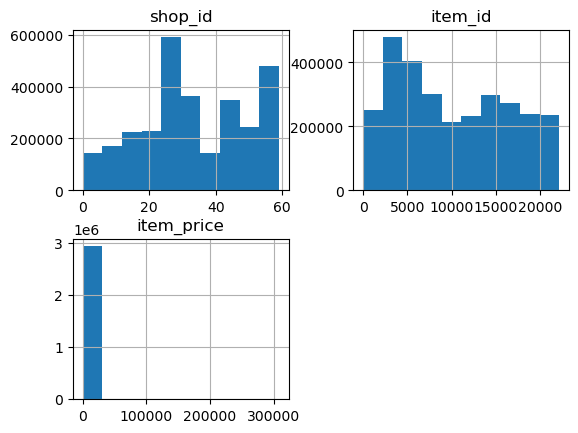

In [41]:
vis = sales_a [["shop_id","item_id","item_price"]]
vis.hist()
plt.show()

In [46]:

# Convert the date column to datetime format
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')

# Select only the numeric columns
numeric_columns = sales.select_dtypes(include=['float64', 'int64']).columns

# Generate the correlation matrix
correlation_matrix = sales.corr()
print(correlation_matrix)

                    date  date_block_num   shop_id   item_id  item_price  \
date            1.000000        0.999516  0.019230  0.009218    0.095429   
date_block_num  0.999516        1.000000  0.019273  0.009356    0.095010   
shop_id         0.019230        0.019273  1.000000  0.029396   -0.024034   
item_id         0.009218        0.009356  0.029396  1.000000   -0.134104   
item_price      0.095429        0.095010 -0.024034 -0.134104    1.000000   
item_cnt_day    0.009568        0.009402 -0.005230  0.016650    0.011197   

                item_cnt_day  
date                0.009568  
date_block_num      0.009402  
shop_id            -0.005230  
item_id             0.016650  
item_price          0.011197  
item_cnt_day        1.000000  


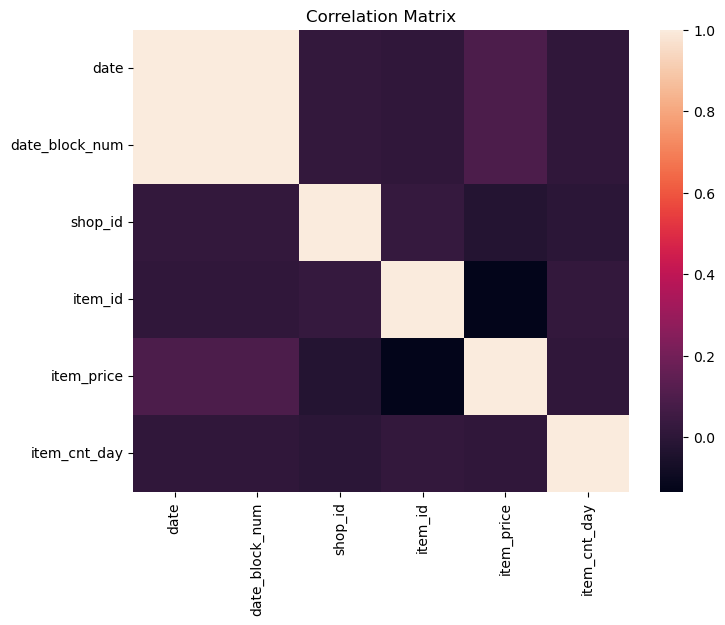

In [47]:
#Visualize correlation matrix using heatmap
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix) #Learn more about hyperparameters
plt.title("Correlation Matrix")
plt.show()

In [48]:
# convert correction to long format and sort values
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort",ascending=False)

top_corr = sorted_pairs[sorted_pairs < 1].drop_duplicates().head(5)
print(top_corr)

date_block_num  date              0.999516
item_price      date              0.095429
                date_block_num    0.095010
item_id         shop_id           0.029396
date_block_num  shop_id           0.019273
dtype: float64


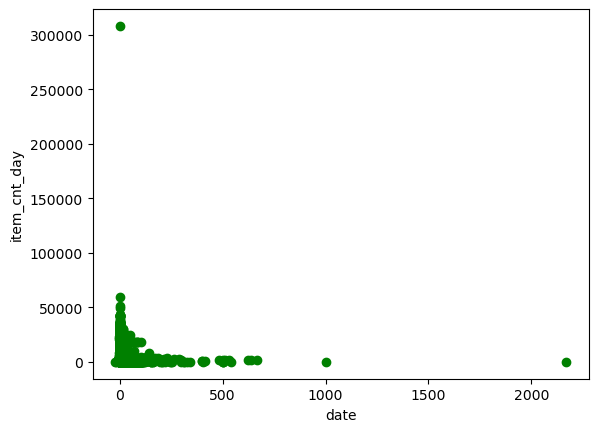

In [57]:
plt.scatter(sales['item_cnt_day'], sales['item_price'], color='green')
plt.xlabel("Item Price")
plt.ylabel("Item Count per day")
plt.show()

### Creating the train and test dataset
we create using np.random.rand()function:


In [67]:
msk = np.random.rand(len(sales)) < 1.0
msk = np.random.rand(len(test)) < 1.0

In [68]:
msk

array([ True,  True,  True, ...,  True,  True,  True])

In [69]:
len(msk)

214200

In [70]:
count = 0
for a in range(len(msk)):
    if(msk[a] == True):
        count = count + 1
print(count) 

214200


In [72]:
# Assuming sales_a is your sales DataFrame
sales_a = sales.copy()

# Generate a boolean mask for splitting the data (e.g., 80% training, 20% testing)
msk = np.random.rand(len(sales_a)) < 0.8

# Use the mask to create training and testing sets
train = sales_a[msk]
test = sales_a[~msk]

# Display the first few rows of the training and testing sets
print("Training Set:")
print(train.head(), "\n")

print("Testing Set:")
print(test.head())

Training Set:
        date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-01-02               0       59    22154      999.00           1.0
1 2013-01-03               0       25     2552      899.00           1.0
2 2013-01-05               0       25     2552      899.00          -1.0
3 2013-01-06               0       25     2554     1709.05           1.0
4 2013-01-15               0       25     2555     1099.00           1.0 

Testing Set:
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
5  2013-01-10               0       25     2564       349.0           1.0
7  2013-01-04               0       25     2572       239.0           1.0
14 2013-01-10               0       25     2574       399.0           1.0
18 2013-01-26               0       25     2574       399.0           1.0
22 2013-01-27               0       25     2604       299.0           1.0


### Simple Regression Model
Linear Regression fits a linear model with coefficients

### Train data distribution

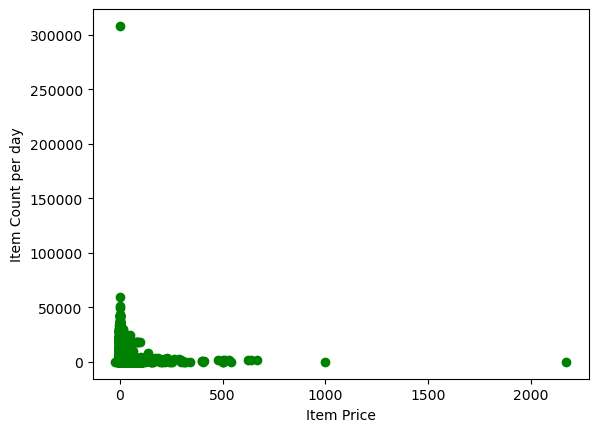

In [73]:
plt.scatter(sales_a['item_cnt_day'], sales_a['item_price'], color='green')
plt.xlabel("Item Price")
plt.ylabel("Item Count per day")
plt.show()

### Modeling 

In [76]:
#using sklearn packages to model the data
from sklearn import linear_model


# Display the columns of the training set to verify the names
print("Columns in the training set:", train.columns)

# Assuming the correct column names are 'item_price' and 'item_cnt_day' based on typical sales data structure
# Adjust the column names based on your actual data
train_x = np.asarray(train[['item_price']])
train_y = np.asarray(train[['item_cnt_day']])

# Initialize the linear regression model
regr = linear_model.LinearRegression()

# Train the model
regr.fit(train_x, train_y)

# Print the coefficients
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

Columns in the training set: Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
Coefficients: [[1.73771526e-05]]
Intercept: [1.22807529]


Text(0, 0.5, 'Item Count per day')

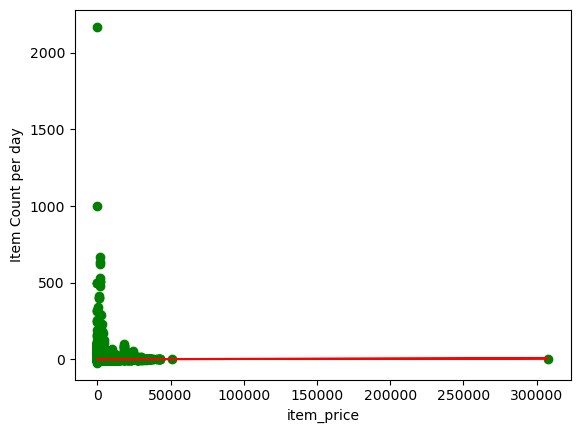

In [77]:
# plot outputs
# plot a fit line over the data
plt.scatter(train['item_price'], train['item_cnt_day'], color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("item_price")
plt.ylabel("Item Count per day")

In [78]:
regr.coef_[0][0]*2 + regr.intercept_[0]

1.228110046104935

### Evaluation
Submissions are evaluated by root mean squared error (RMSE). True target values are clipped into [0,20] range.

Submission File

For each id in the test set, you must predict a total number of sales. The file should contain a header and have the following format:

ID,item_cnt_month
0,0.5
1,0.5
2,0.5
3,0.5
etc.

In [79]:
#Evaluation
#Getting the: Mean Absolute Error Mean Squared Error(MSE) Root Mean Squared Error (RMSE)
from sklearn.metrics import r2_score


# Assuming sales_a DataFrame exists and has been split into train and test sets

# Check the columns of test DataFrame to ensure correct names
print("Columns in the test set:", test.columns)

# Assuming the correct column names are 'Age' and 'Annual Income ($)'
# Ensure these column names exist in the test DataFrame
if 'item_price' in test.columns and 'item_cnt_day' in test.columns:
    # Prepare test data
    test_x = np.asarray(test[['item_price']])
    test_y_actual = np.asarray(test[['item_cnt_day']])
    
    # Predict using the trained model
    test_y_predicted = regr.predict(test_x)

    # Evaluate the model
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_actual - test_y_predicted)))
    print("Mean squared error: %.2f" % np.mean((test_y_actual - test_y_predicted) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_actual, test_y_predicted))
else:
    print("The required columns 'item_price' and 'Annual Income ($)' are not present in the test DataFrame.")


Columns in the test set: Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
Mean absolute error: 0.44
Mean squared error: 4.11
R2-score: 0.00
